# Machine Learning with Regression

## Contents
1. **Loading** Boston dataset
2. Splitting into **train**- and **test**-set
3. Creating a **model** and training it
4. **Predicting** test set
5. **Evaluating** the result
6. Using **other models**

This notebook will explain how to make a regression analysis to predict features of our data. We will use a linear regression because the concept is easy to understand. The dataset we will use is the Boston-dataset from ScikitLearn.

A regression analysis tries to fit a model to a certain dataset, just like classification did. However, classification tries to match a specific set of labels with the data. Regression allows us to predict continuous values, like numbers, even if we haven't seen an entry in the data with that number before.

To start, we do some Python imports...

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

## 1. Loading Boston dataset

We load the dataset from the datasets module in sklearn.

In [95]:
boston = datasets.load_boston()

The dataset contains a "data" and a "target" element. The "data"-element contains the features. The "target"-element contains the values we want to predict for each row in the data.
We can check the dimensions of these arrays to see how many rows and features there are.

In [96]:
print("Data is an " + str(boston.data.shape) + " array.")
print("Target is an " + str(boston.target.shape) + " array.")

Data is an (506, 13) array.
Target is an (506,) array.


We can print the description of the dataset, to gain information about the data in the columns.

In [97]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Our Boston-dataset contains information about houses in Boston. Every house has a number of features, like the number of rooms or the crime rate in the town. Our goal is to predict the house's price from these features.

## 2. Splitting into train- and test-set

We must prepare the data before we can use it in an algorithm. We must turn our data- and target-array into a train_X, train_y, test_X and test_y set. To do this, we will write a function that we can use througout the notebook. We could also use sklearn's function for this, like we did in the previous notebook. But to get a better understanding of what happens, we will do it ourselves.

Write a function that:
* Takes `data`, `target` and `splitsize=20` as parameters.
* Splits the data into `X_train` and `X_test`.
* Splits the target into `y_train` and `y_test`.

Hint: In Python, you can select the last 5 elements from an array like this: `a[-5:]`.

In [98]:
### SOLUTION ###
def split_train_test(data, target, splitsize=20):
    X_train = data[:-splitsize:]
    X_test  = data[-splitsize::]
    
    y_train = target[:-splitsize]
    y_test  = target[-splitsize:]
    
    return X_train, y_train, X_test, y_test

In [99]:
X_train, y_train, X_test, y_test = split_train_test(boston.data, boston.target)
print("X_train shape: {}, y_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test  shape: {} , y_test  shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (486, 13), y_train shape: (486,)
X_test  shape: (20, 13) , y_test  shape: (20,)


Then call this function on the data and print the shape to confirm we split it the right way.

The shapes should be `(486, 13)`, `(486,)`, `(20, 13)` and `(20,)`.

In [100]:
X_train, y_train, X_test, y_test = split_train_test(boston.data, boston.target)
print("X_train shape: {}, y_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test  shape: {} , y_test  shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (486, 13), y_train shape: (486,)
X_test  shape: (20, 13) , y_test  shape: (20,)


## 3. Creating a model and training it

Next, we will create a new model. For this, find the linear regression model in sklearn and call its constructor (without parameters).

In [101]:
model = linear_model.LinearRegression()# TODO: create empty model

The model is still empty and doesn't know anything. Train (fit) it with our train-data, so that it learns things about our Boston-dataset.

In [102]:
# TODO: fit the train-data to the model
model.fit(X_train, y_train)

LinearRegression()

## 4. Predicting test set

Now we will use our trained model to make predictions about the test-data. This means that for the given X_test values, we will ask the model what the y_values would be, based on our X_train and y_train combinations.

In sklearn, the model has a function for this. Predict the y_test values with this function. We will store these values as y_pred.

In [103]:
y_pred = model.predict(X_test) # TODO: predict y_pred from X_test

## 5. Evaluating the result

We now have y_test (the real values for X_test) and y_pred. We can print these values and compare them, to get an idea of how good the model predicted the data.

In [104]:
print(y_test)
print("-"*75)  # print a line
print(y_pred)

[19.1 20.6 15.2  7.   8.1 13.6 20.1 21.8 24.5 23.1 19.7 18.3 21.2 17.5
 16.8 22.4 20.6 23.9 22.  11.9]
---------------------------------------------------------------------------
[19.52851487 21.13030683 10.69052057  6.94917077  2.25423441 12.61186689
 14.82173569 20.44306906 20.30781014 16.40520255 13.71615353 18.97549154
 21.14696273 18.3123007  20.36823484 23.73106449 22.649771   28.04655708
 26.5264822  22.68372601]


However, it is hard to look at the numbers and decide how good the model was. We will need some kind of metric to evaluate our prediction. There are a lot of metrics we can use, so let's define two that are useful for regression.

### 5.1. Mean squared error

The mean squared error (MSE) measures the average error in our predictions. Between each point and prediction, the error is measured. These errors can be positive or negative if the prediction is below or above the actual value, so we need to take the absolute value of the error. But as we want to punish grave mistakes harder, we also square the errors. Then the average is calculated over all these squared errors. The result is one number that can be compared across different models.

Write a function that:
* Takes y_test en y_pred as parameters.
* Calculates the mean squared error
* Prints the result.

In [105]:
from sklearn.metrics import mean_squared_error

def print_mean_squared_error(y_test, y_pred):
    # TODO: complete this function
    
    mse = mean_squared_error(y_test, y_pred)
    
    print("Mean squared error: {:.2f}".format(mse))

Let's calculate the mean squared error for our model.

In [106]:
print_mean_squared_error(y_test, y_pred)

Mean squared error: 17.88


The closer to 0.0 this value is, the better the model predicts the y_test values.

### 5.2. $R^2$ score

Another metric to calculate how well our model performed is the $R^2$ score. This metric is often used in linear regression. It calculates the variance of our y_pred from our y_test by taking the square of the correlation coefficient between y_pred and y_test.

Write a function that:
* Takes y_test en y_pred as parameters.
* Calculates the $R^2$ score.
* Prints the result.

In [107]:
from sklearn.metrics import r2_score

def print_r2_score(y_test, y_pred):
    # TODO: complete this function
    
    r2 = r2_score(y_test, y_pred)
    
    print("R2 score: {:.2f}".format(r2))

Now we calculate the $R^2$ score for our trained model.

In [108]:
print_r2_score(y_test, y_pred)

R2 score: 0.24


If this value is 1.0, our model made a perfect prediction of the true data.

### 5.3. Visualising the result

These values are easier to understand if we can visualise the data in some way.

For this we write a function that visualises the actual and the predicted data. Because this function has little to do with machine learning and a lot more with Python's visualisation library Matplotlib, it is given below.

In [109]:
def visualise_features(X_test, y_test, y_pred, column=0):
    # we can only visualise two dimensions, so if the data has more columns, select one
    if len(X_test) > 1:
        X_test = X_test[:, column]
    
    plt.scatter(X_test, y_test, color='blue', label='True data')
    plt.scatter(X_test, y_pred, color='orange', label='Predicted')
    plt.xlabel("Features")
    plt.ylabel("Labels")
    plt.legend(loc='best')
    plt.show()

Let's use this function to plot the data. To explain what we're seeing: the x-axis shows the X_test values of a certain column. The y-axis shows the y_test labels in blue and the y_pred labels in orange. So for every value on the x-axis, there will be two y-values. The orange dot should be as close to the blue dot as possible for us to have a good model.

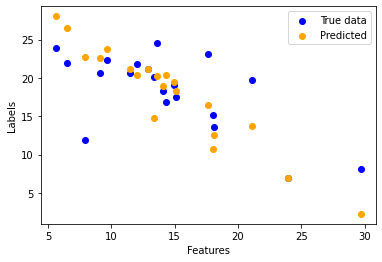

In [110]:
visualise_features(X_test, y_test, y_pred, column=12)

Looking at this plot, we see that the predicted values sometimes come close to the real ones, and sometimes they are completely different. What is important to notice is that our orange predicted dots all seem to follow one line (more or less). This is to be expected, as we used a linear model to predict our data. Linear models assume our data has a linear shape and try to find the best linear model for the data.

Our prediction differs from our perfectly linear model however. The reason for this is simple: we used all the columns in the data to predict the final label. But when we visualised the data, we picked only one column for the X-axis. To demonstrate, let's train the model on just one column of our data.

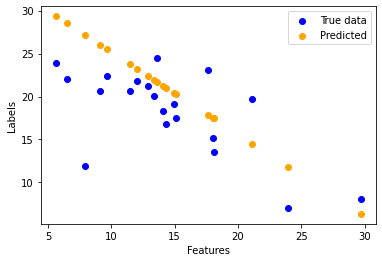

In [111]:
column = 12  # we'll only consider the data's 12th column
X_train, y_train, X_test, y_test = split_train_test(boston.data[:, column:column+1], boston.target)
model =  linear_model.LinearRegression() # TODO: fill this in with the model, as before
model = model.fit(X_train, y_train)          # TODO: train the model as before
y_pred = model.predict(X_test) # TODO: predict y_pred as before
visualise_features(X_test, y_test, y_pred, column=0)

Now, we see our prediction is perfectly linear. 

## 6. Using other models

Sklearn contains a lot of models. After turning our data into a train- and test-dataset, we can apply multiple models to it. Below is a list of model names. Try to find each of them in sklearn and call the constructor.

In [112]:
from sklearn import svm

models = {
    "Linear Regression": linear_model.LinearRegression(),  # TODO: fill in (don't forget the comma at the end)
    "Support Vector Machine (SVM)": svm.SVR(),
    "Stochastic Gradient Descent (SGD) Regressor": linear_model.SGDRegressor(),
    "Bayesian Ridge Regression": linear_model.BayesianRidge(),
    "Lasso model with Least Angle Regression (Lars)": linear_model.Lars(),
    "Automatic Relevance Determination (ARD) Regression": linear_model.ARDRegression(),
    "Passive Aggressive Regressor": linear_model.PassiveAggressiveRegressor(),
    "Theil-Sen Regression": linear_model.TheilSenRegressor()
}

Now we can use this list of models and apply them all to our data. If we print the names and the scores, we can compare them and find the best model for our data.

As before, train the model and predict the data.

In [117]:
X_train, y_train, X_test, y_test = split_train_test(boston.data, boston.target)

for modelName, model in models.items():  # iterate over all models
    print(modelName)
    model = model.fit(X_train, y_train)          # TODO: train the model as before
    y_pred =  model.predict(X_test)# TODO: predict y_pred as before
    print_mean_squared_error(y_test, y_pred)
    print_r2_score(y_test, y_pred)
    print("-"*75)  # print a line

Linear Regression
Mean squared error: 17.88
R2 score: 0.24
---------------------------------------------------------------------------
Support Vector Machine (SVM)
Mean squared error: 16.59
R2 score: 0.29
---------------------------------------------------------------------------
Stochastic Gradient Descent (SGD) Regressor
Mean squared error: 3456810409601815394524332032.00
R2 score: -147852678542940999172227072.00
---------------------------------------------------------------------------
Bayesian Ridge Regression
Mean squared error: 22.78
R2 score: 0.03
---------------------------------------------------------------------------
Lasso model with Least Angle Regression (Lars)
Mean squared error: 54.74
R2 score: -1.34
---------------------------------------------------------------------------
Automatic Relevance Determination (ARD) Regression
Mean squared error: 17.61
R2 score: 0.25
---------------------------------------------------------------------------
Passive Aggressive Regressor


Remember, the mean squared error should be closest to 0 and the $R^2$ score closest to 1. Did one of the other models perform better than the linear regression model we used first?